In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from google.cloud import bigquery

In [5]:
project_id = "686172640179"  # Reemplaza "tu-id-de-proyecto" con el ID de tu proyecto de Google Cloud

client = bigquery.Client(project=project_id)

# covid19_open_data

In [18]:
dataset_ref = client.dataset("covid19_open_data", project = "bigquery-public-data")
tables = list(client.list_tables(dataset_ref))
for table in tables:
    print(table.table_id)

NameError: name 'client' is not defined

In [ ]:
table_ref = dataset_ref.table("compatibility_view")
table = client.get_table(table_ref)

In [ ]:
table

Table(TableReference(DatasetReference('bigquery-public-data', 'covid19_open_data'), 'compatibility_view'))

In [ ]:
df = client.list_rows(table, max_results=10).to_dataframe()
df

# covid19_vaccination_search_insights

In [ ]:
dataset_ref = client.dataset("covid19_vaccination_search_insights", project = "bigquery-public-data")
tables = list(client.list_tables(dataset_ref))
for table in tables:
    print(table.table_id)

covid19_vaccination_search_insights


# bigquery-public-data.covid19_tracking

In [6]:
dataset_ref = client.dataset("covid19_tracking", project = "bigquery-public-data")
tables = list(client.list_tables(dataset_ref))
for table in tables:
    print(table.table_id)

city_level_cases_and_deaths
covid_racial_data_tracker
national_testing_and_outcomes
state_facility_level_long_term_care
state_level_aggregate_long_term_care
state_level_cumulative_long_term_care
state_level_current_outbreak_long_term_care
state_screenshots
state_testing_and_outcomes


In [ ]:
table_ref = dataset_ref.table("covid_racial_data_tracker")
table = client.get_table(table_ref)
df = client.list_rows(table, max_results=5323).to_dataframe()

# Todo

In [ ]:
estados = df["state"].unique()
print(f"Hay {len(estados)} países distintos en el DataFrame:")
print(estados)

Hay 56 países distintos en el DataFrame:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'AS' 'MP' 'NY' 'PR' 'VI']


In [ ]:
estados = {}
estados_distintos = df["state"].unique()
estados_filtro = {}
fecha = {}
estados_filtro_diff = {}
for estado in estados_distintos:
    estados[estado] = df.loc[df["state"] == estado]
    estados_filtro[estado] = estados[estado][["date", "cases_white", "cases_black","cases_ethnicity_hispanic", "deaths_white", "deaths_black","deaths_ethnicity_hispanic", "hosp_white", "hosp_black","hosp_ethnicity_hispanic"]]
    estados_filtro[estado] = estados_filtro[estado].sort_values(by='date')
    estados_filtro_diff[estado] = estados_filtro[estado].diff()



In [ ]:
estados_filtro["AR"]

,date,cases_white,cases_black,cases_ethnicity_hispanic,deaths_white,deaths_black,deaths_ethnicity_hispanic,hosp_white,hosp_black,hosp_ethnicity_hispanic
283,2020-04-12,814,324,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
282,2020-04-15,945,441,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
281,2020-04-19,1049,511,<NA>,23,14,<NA>,<NA>,<NA>,<NA>
280,2020-04-22,1179,654,86,25,14,<NA>,<NA>,<NA>,<NA>
279,2020-04-26,1340,808,107,29,16,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
193,2021-02-21,202390,49787,33789,4188,799,182,<NA>,<NA>,<NA>
192,2021-02-24,203622,50017,33915,4207,806,183,<NA>,<NA>,<NA>
191,2021-02-28,205690,50508,34096,4113,773,178,<NA>,<NA>,<NA>
190,2021-03-03,206422,50642,34179,4126,778,178,<NA>,<NA>,<NA>


In [ ]:
estados_filtro["AR"]["deaths_white"]

283    <NA>
282    <NA>
281      23
280      25
279      29
       ... 
193    4188
192    4207
191    4113
190    4126
189    4171
Name: deaths_white, Length: 95, dtype: Int64

In [ ]:
plt.figure(figsize=(12, 6))
cual = "AR"
plt.plot(estados_filtro[cual]["date"][1:],estados_filtro_diff[cual]['cases_white'][1:], marker='.', linestyle='-')
plt.plot(estados_filtro[cual]["date"][1:],estados_filtro_diff[cual]['deaths_white'][1:], marker='.', linestyle='-')
plt.grid(True)
plt.show()

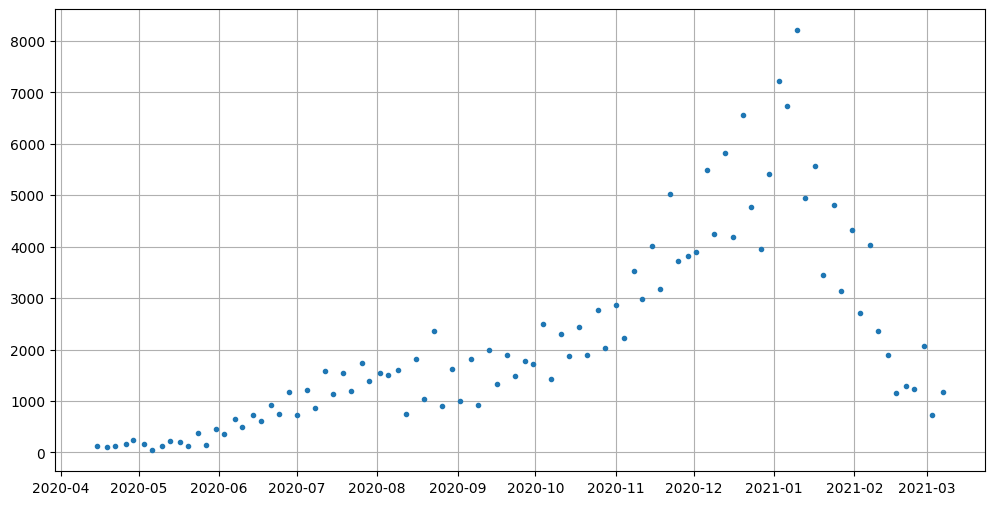

In [ ]:
data_cleaned = estados_filtro_diff["AR"].dropna(subset=['cases_white'])

# Graficar 'cases_white' y 'estados_filtro["AR"]["date"]' en el eje x
plt.figure(figsize=(12, 6))
plt.plot(estados_filtro["AR"]['date'][1:], data_cleaned['cases_white'], marker='.', linestyle='None')
plt.grid(True)
plt.show()

In [ ]:
len(estados_filtro[cual]["date"])

95